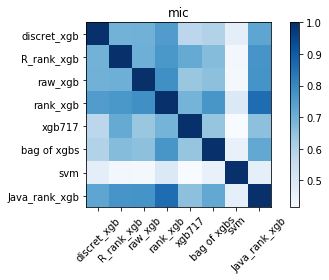

In [6]:
import pandas as pd
import numpy as np
from minepy import MINE

fs = ['discret_xgb','R_rank_xgb','raw_xgb','rank_xgb','xgb717','bag of xgbs','svm','Java_rank_xgb']

res = []
res.append(pd.read_csv('C:/Users/tianjiayang/loan_predicting/mix of models/discrete_feature_xgb.csv').score.values)
res.append(pd.read_csv('C:/Users/tianjiayang/loan_predicting/mix of models/7199.csv').score.values)
res.append(pd.read_csv('C:/Users/tianjiayang/loan_predicting/mix of models/raw_feature_xgb.csv').score.values)
res.append(pd.read_csv('C:/Users/tianjiayang/loan_predicting/mix of models/rank_feature_xgb.csv').score.values)
res.append(pd.read_csv('C:/Users/tianjiayang/loan_predicting/mix of models/xgb717.csv').score.values)
res.append(pd.read_csv('C:/Users/tianjiayang/loan_predicting/mix of models/36-xgb.csv').score.values)
res.append(pd.read_csv('C:/Users/tianjiayang/loan_predicting/mix of models/svm6938.csv').score.values)
res.append(pd.read_csv('C:/Users/tianjiayang/loan_predicting/mix of models/7218.csv').score.values)
cm = []
for i in range(8):
    tmp = []
    for j in range(8):
        m = MINE()
        m.compute_score(res[i], res[j])
        tmp.append(m.mic())
    cm.append(tmp)


import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, title, cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(8)
    plt.xticks(tick_marks, fs, rotation=45)
    plt.yticks(tick_marks, fs)
    plt.tight_layout()

plot_confusion_matrix(cm, title='mic')
plt.show()

选择混淆矩阵中差异性比较大的几个来尝试简单的加权融合。

# 1. 0.15XGB + 0.25SVM + 0.6Bagging of XGB

In [7]:

import pandas as pd


xgb717 = pd.read_csv("xgb717.csv")
svm = pd.read_csv('svm6938.csv')
xgb725 = pd.read_csv('36-xgb.csv')

uid = xgb717.uid
score = 0.15*xgb717.score+0.25*svm.score+0.6*xgb725.score
pred = pd.DataFrame(uid,columns=['uid'])
pred['score'] = score

pred.to_csv('1submission.csv',index=None,encoding='utf-8')

# 2.0.2SVM + 0.65Bagging of XGB + 0.15single XGB_R

In [8]:
rxgb = pd.read_csv('7199.csv')
score2 = 0.2*svm.score + 0.65*xgb725.score + 0.15*rxgb.score
uid = rxgb.uid
pred2 = pd.DataFrame(uid,columns=['uid'])
pred2['score'] = score2
pred2.to_csv('2submission.csv',index=None,encoding='utf-8')


# 3.0.8part1 + 0.2xgb by java

In [9]:
part1 = pd.read_csv('2submission.csv')
jxgb = pd.read_csv('7218.csv')
score3 = 0.8*part1.score + 0.2*jxgb.score
pred3 = pd.DataFrame(uid,columns=['uid'])
pred3['score'] = score
pred3.to_csv('3submission3.csv',index=None,encoding='utf-8')

In [ ]:
FINAL ONLINE TEST AUC: 0.7271